In [1]:
import tweepy
from login_keys import consumer_key ,consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [2]:
public_tweets = api.home_timeline(count=50)

In [3]:
import re

filtered_text = ""
for tweet in public_tweets:
    print(tweet.text)
    filtered_text += re.sub(r"http\S+", "", tweet.text)

Los docentes rechazaron la oferta salarial del gobierno bonaerense. Baradel dijo que la recomposición del 5% no se… https://t.co/FeK3ckc2WL
Estalla la polémica: por qué retiraron de circulación un libro sobre la vida y la obra de Alberto Migré… https://t.co/2YV0vixYHa
En plena sesión, Cristina Fernandez de Kirchner  se defendió de las causas por corrupción que debe afrontar.… https://t.co/XS2g5iSC6M
Mariana Fabbiani reveló un dato curioso (e ilegal) del desayuno de Luis Miguel https://t.co/WvvvJnP8e8 https://t.co/CZ8drZ5bYf
Causa judicial
Detuvieron en el aeropuerto al barrabrava Darío Cáceres https://t.co/zcDwiFab9w https://t.co/I231nZwmqn
La exquisita definición de Luis Suárez que provocó la furia de Sergio Ramos en la goleada del Barcelona al Real Mad… https://t.co/mcG7yMoMhx
¡CADA VEZ MÁS CERCA! Este es el #Lineup de #LollaAR 2019 por día. Conocé cuándo tocan tus artistas favoritos durant… https://t.co/vA7VFjOsNa
TODO ROTO

La última medida legal de Centurión contra Racing.

https:

In [4]:
filtered_text

'Los docentes rechazaron la oferta salarial del gobierno bonaerense. Baradel dijo que la recomposición del 5% no se… Estalla la polémica: por qué retiraron de circulación un libro sobre la vida y la obra de Alberto Migré… En plena sesión, Cristina Fernandez de Kirchner  se defendió de las causas por corrupción que debe afrontar.… Mariana Fabbiani reveló un dato curioso (e ilegal) del desayuno de Luis Miguel  Causa judicial\nDetuvieron en el aeropuerto al barrabrava Darío Cáceres  La exquisita definición de Luis Suárez que provocó la furia de Sergio Ramos en la goleada del Barcelona al Real Mad… ¡CADA VEZ MÁS CERCA! Este es el #Lineup de #LollaAR 2019 por día. Conocé cuándo tocan tus artistas favoritos durant… TODO ROTO\n\nLa última medida legal de Centurión contra Racing.\n\n El video fue compartido en una red social china y muestra a distintos padres a cargo de niños. El más destacado es… Qué reveló la autopsia de la nena de 5 años que murió tras ser dada de alta tres veces en un hosp

In [5]:
from os import path
d = path.dirname(".")
stop_words = open(path.join(d, 'spanish.txt'), encoding="utf8").read()

In [6]:
import string
from string import punctuation

In [7]:
exclude = set(string.punctuation)
#s = ' '.join(ch for ch in s if ch not in exclude)
exclude

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [8]:
# lower to get better comparison
filtered_text = filtered_text.lower()
stop_words = stop_words.lower()

# added punctuation symbols used in spanish
punctuation = punctuation + "\'¿¡"

# apply filters
filtered_text = ''.join(c for c in filtered_text if c not in punctuation)
filtered_text = ' '.join([word for word in filtered_text.split() if word not in stop_words])
filtered_text = ' '.join([word for word in filtered_text.split() if not word.startswith('@')])



In [9]:
filtered_text

'docentes rechazaron oferta salarial gobierno bonaerense baradel dijo recomposición 5 se… estalla polémica retiraron circulación libro vida obra alberto migré… plena sesión cristina fernandez kirchner defendió causas corrupción debe afrontar… mariana fabbiani reveló dato curioso ilegal desayuno luis miguel causa judicial detuvieron aeropuerto barrabrava darío cáceres exquisita definición luis suárez provocó furia sergio goleada barcelona real mad… cada vez cerca lineup lollaar 2019 día conocé cuándo tocan artistas favoritos durant… roto última medida legal centurión racing video compartido red social china muestra distintos padres cargo niños destacado es… reveló autopsia nena 5 años murió dada alta tres veces hospital público por… ahora mejores canciones música romántica latina nueva playlist 100 deezer dale play… traveling abroad for spring break use whatsapp coordinate with friends stay touch with people back home… gobierno cree recesión tocó piso noviembre economía encontraría fase

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

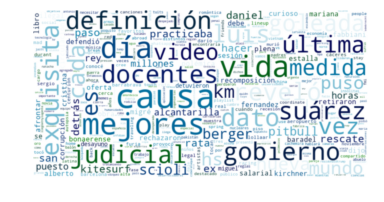

In [11]:
wordcloud = WordCloud(width=800,height=400,max_font_size=80,background_color="white",max_words=500,colormap="ocean").generate(filtered_text)
plt.figure()
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis("off")
plt.show()

In [12]:
screen_name="lucasprone"

In [13]:
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy

    # api = tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print("getting tweets before %s" % (oldest))
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print("...%s tweets downloaded so far" % (len(alltweets)))
    


getting tweets before 527270075058094079
...391 tweets downloaded so far
getting tweets before 376389912984965119
...591 tweets downloaded so far
getting tweets before 281973086201458687
...784 tweets downloaded so far
getting tweets before 177963280248209408
...850 tweets downloaded so far
getting tweets before 55111432219537408
...850 tweets downloaded so far


In [14]:
mis_tweets = ""
for tweet in alltweets:
    print((tweet.text))
    mis_tweets +=(tweet.text + " ")

@_GrinGa_ alimenta el TOC, pero sin TACC 🤙😝
@_GrinGa_ jajaja es demasiado bueno como para no compartirlo!
I Am AI: GTC 2018 Kickoff https://t.co/HkeWo1vGlv vía @YouTube
@atilo @eltreceoficial Si no puedes vestir la piel del león, viste la del zorro... Excelente serie, nunca me canso de verla 👍
RT @infobae: El conmovedor anuncio navideño que desnuda el impacto de las redes sociales en la familia https://t.co/1VQlsLeOfP https://t.co…
Una gran escena, nunca me canso de verla. Excelente Santos https://t.co/mr7k6DOR91
@RealTimeRating #cronica falta un mes para Navidad :p
Las palabras son nuestra más inagotable fuente de magia 😀 #Pottermania
RT @infobae: Gene Sheldon: la historia del hombre que debutó como locutor pero se hizo famoso como el asistente mudo de "El Zorro" https://…
I saw @NoelGallagher in Rosario and Boca won their match, great Saturday! :)
RT @sebastia_me: En Alemania tienen semáforos en los que podes jugar al Pong con una persona que está del otro lado *no cruzaba mas* https

RT @wiemeyer: Yo divido al mundo entre la gente que silba al caminar y la que no.
RT @BocaJrsOficial: ¡MUCHAS GRACIAS PALERMO!
Goooooooooooooooollll!!!!!!!!!! Vamos boca!!!!
@CorreaMaxi  el if lo hago con los ojos cerrados, el que mata es el do
Avanzando con avanzada
Gooooooolllll
Palermo esta contento, palermo esta feliz
RT @wiemeyer: Da un perverso placer pasar por ese negocio donde atendían como el orto y ver que cerró...
Resolve problemas matematicos programando - http://t.co/QarzZLK vía @Taringa


In [15]:
filtered_text = re.sub(r"http\S+", "", mis_tweets)
filtered_text = filtered_text.replace("RT ","  ")

In [16]:
filtered_text

'@_GrinGa_ alimenta el TOC, pero sin TACC 🤙😝 @_GrinGa_ jajaja es demasiado bueno como para no compartirlo! I Am AI: GTC 2018 Kickoff  vía @YouTube @atilo @eltreceoficial Si no puedes vestir la piel del león, viste la del zorro... Excelente serie, nunca me canso de verla 👍   @infobae: El conmovedor anuncio navideño que desnuda el impacto de las redes sociales en la familia   Una gran escena, nunca me canso de verla. Excelente Santos  @RealTimeRating #cronica falta un mes para Navidad :p Las palabras son nuestra más inagotable fuente de magia\xa0😀 #Pottermania   @infobae: Gene Sheldon: la historia del hombre que debutó como locutor pero se hizo famoso como el asistente mudo de "El Zorro"  I saw @NoelGallagher in Rosario and Boca won their match, great Saturday! :)   @sebastia_me: En Alemania tienen semáforos en los que podes jugar al Pong con una persona que está del otro lado *no cruzaba mas*    @infobae: Dos argentinas premiadas por crear un asistente virtual para mejorar la pronunciac

In [17]:
# lower to get better comparison
filtered_text = filtered_text.lower()

filtered_text.replace("@", " @")
filtered_text = " ".join(filter(lambda x:x[0]!='#', filtered_text.split()))
filtered_text = " ".join(filter(lambda x:x[0]!='@', filtered_text.split()))
# filtered_text = ' '.join([word for word in filtered_text.split() if not word.startswith('@')])

In [18]:
filtered_text

'alimenta el toc, pero sin tacc 🤙😝 jajaja es demasiado bueno como para no compartirlo! i am ai: gtc 2018 kickoff vía si no puedes vestir la piel del león, viste la del zorro... excelente serie, nunca me canso de verla 👍 el conmovedor anuncio navideño que desnuda el impacto de las redes sociales en la familia una gran escena, nunca me canso de verla. excelente santos falta un mes para navidad :p las palabras son nuestra más inagotable fuente de magia 😀 gene sheldon: la historia del hombre que debutó como locutor pero se hizo famoso como el asistente mudo de "el zorro" i saw in rosario and boca won their match, great saturday! :) en alemania tienen semáforos en los que podes jugar al pong con una persona que está del otro lado *no cruzaba mas* dos argentinas premiadas por crear un asistente virtual para mejorar la pronunciación en inglés | por julieta schulkin el video de los astronautas en la luna acelerado es 10 veces mejor 💐 💐 1: sueño 2: locura 3: 𝗟𝗼𝗰𝘂𝗿𝗮 𝗰𝗼𝗻 𝗼𝘁𝗿𝗮 𝗹𝗲𝘁𝗿𝗮 😝 spacex launc

In [19]:
filtered_text.replace(punctuation, " ")


'alimenta el toc, pero sin tacc 🤙😝 jajaja es demasiado bueno como para no compartirlo! i am ai: gtc 2018 kickoff vía si no puedes vestir la piel del león, viste la del zorro... excelente serie, nunca me canso de verla 👍 el conmovedor anuncio navideño que desnuda el impacto de las redes sociales en la familia una gran escena, nunca me canso de verla. excelente santos falta un mes para navidad :p las palabras son nuestra más inagotable fuente de magia 😀 gene sheldon: la historia del hombre que debutó como locutor pero se hizo famoso como el asistente mudo de "el zorro" i saw in rosario and boca won their match, great saturday! :) en alemania tienen semáforos en los que podes jugar al pong con una persona que está del otro lado *no cruzaba mas* dos argentinas premiadas por crear un asistente virtual para mejorar la pronunciación en inglés | por julieta schulkin el video de los astronautas en la luna acelerado es 10 veces mejor 💐 💐 1: sueño 2: locura 3: 𝗟𝗼𝗰𝘂𝗿𝗮 𝗰𝗼𝗻 𝗼𝘁𝗿𝗮 𝗹𝗲𝘁𝗿𝗮 😝 spacex launc

In [20]:
stop_words = stop_words.lower()

# added punctuation symbols used in spanish
punctuation = punctuation + "\'¿¡"

# apply filters
filtered_text = ''.join(c for c in filtered_text if c not in punctuation)
filtered_text = ' '.join([word for word in filtered_text.split() if word not in stop_words])
filtered_text = filtered_text.replace("jajajaja","jajaja")
filtered_text = filtered_text.replace("jajajaj","jajaja")
filtered_text = filtered_text.replace(" 5 ","")



In [21]:
filtered_text

'alimenta toc tacc 🤙😝 jajaja demasiado bueno compartirlo gtc 2018 kickoff vía puedes vestir piel león zorro excelente serie nunca canso verla 👍 conmovedor anuncio navideño desnuda impacto redes sociales familia gran escena nunca canso verla excelente santos falta mes navidad palabras inagotable fuente magia 😀 gene sheldon historia hombre debutó locutor hizo famoso asistente mudo zorro saw rosario boca won their match great saturday alemania semáforos podes jugar pong persona lado cruzaba mas argentinas premiadas crear asistente virtual mejorar pronunciación inglés julieta schulkin video astronautas luna acelerado 10 veces mejor 💐 💐 1 sueño 2 locura 3 𝗟𝗼𝗰𝘂𝗿𝗮 𝗰𝗼𝗻 𝗼𝘁𝗿𝗮 𝗹𝗲𝘁𝗿𝗮 😝 spacex launch saocom mission vía uso bastón información casi desconocida resulta útil importante difundir trailer final definitivo animales fantásticos 2 crímenes grindelwald ⚡️ empecé primavera poniendo lavaropas jabón suavizante 👨\u200d💻 año ocurre estación kings cross simplemente maravilloso preocupa intolerancia

In [22]:
from collections import Counter
Counter(filtered_text.split()).most_common()[:20]

[('jajaja', 109),
 ('dormir', 33),
 ('día', 25),
 ('vía', 19),
 ('feliz', 18),
 ('mas', 16),
 ('hoy', 16),
 ('buena', 15),
 ('nunca', 14),
 ('mejor', 14),
 ('solo', 14),
 ('gracias', 14),
 ('grande', 14),
 ('ver', 14),
 ('voy', 14),
 ('excelente', 13),
 ('mundo', 13),
 ('the', 13),
 ('gente', 13),
 ('mañana', 13)]

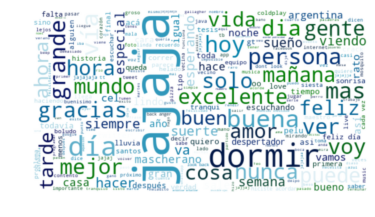

In [23]:
wordcloud = WordCloud(width=550,height=300,max_font_size=80,background_color="white",max_words=350,colormap="ocean").generate(filtered_text)
plt.figure()
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis("off")
plt.show()